In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

In [530]:
n = 10000
N = np.linspace(1, n, n)
data = pd.read_csv('SUSY.csv', dtype=float, nrows=n, usecols=[1, 2, 3, 4, 5, 6, 7, 8], header=None)
data.columns=["pT1", "eta1", "phi1", "pT2", "eta2", "phi2", "ME_mag", "ME_phi"]
data.head()
labels = pd.read_csv('SUSY.csv', dtype=float, nrows=n, usecols=[0], header=None)
labels.columns=["Labels"]

#data_bg = data.sample(frac=1)
#data_bg.reset_index(inplace=True, drop=True)
print(data)
print(labels)

           pT1      eta1      phi1       pT2      eta2      phi2    ME_mag  \
0     0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309  0.567765   
1     1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543  3.475464   
2     0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661  1.219918   
3     0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328  2.033060   
4     1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907  1.087562   
...        ...       ...       ...       ...       ...       ...       ...   
9995  1.730749  0.241074  1.672047  2.189667  0.782387  0.202390  0.984097   
9996  2.528802 -0.061295  0.596659  1.403630 -0.711957 -1.511969  1.062792   
9997  0.551841  0.839182  1.329540  0.670956 -1.208267  0.018613  0.468107   
9998  1.320716 -0.907619  0.306204  0.580286 -1.388913 -1.636499  0.864627   
9999  0.762030  0.518527  1.352423  1.219104  1.609458  0.621935  1.748342   

        ME_phi  
0    -0.175000  
1    -1.219136  
2     0.5040

In [402]:
data.describe()

,Labels,pT1,eta1,phi1,pT2,eta2,phi2,ME_mag,ME_phi
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.458000,0.998473,-0.004496,-0.000648,0.993125,-0.010946,0.015393,1.008317,-0.000015
std,0.498258,0.678865,1.002655,1.004128,0.641595,1.004209,0.999310,0.918953,1.001747
min,0.000000,0.265829,-2.102170,-1.734093,0.428693,-2.058400,-1.733843,0.002086,-1.727112
25%,0.000000,0.562303,-0.760981,-0.871676,0.592593,-0.772137,-0.856581,0.482739,-0.864014
50%,0.000000,0.794279,-0.001058,0.001626,0.799632,-0.002408,0.022697,0.770998,-0.011874
75%,1.000000,1.207049,0.754134,0.876795,1.161719,0.759213,0.878354,1.197405,0.870776
max,1.000000,8.843125,2.101403,1.734187,9.153182,2.059194,1.734349,13.680408,1.740314


In [403]:
data_bg.describe()

,Labels,pT1,eta1,phi1,pT2,eta2,phi2,ME_mag,ME_phi
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.458000,0.998473,-0.004496,-0.000648,0.993125,-0.010946,0.015393,1.008317,-0.000015
std,0.498258,0.678865,1.002655,1.004128,0.641595,1.004209,0.999310,0.918953,1.001747
min,0.000000,0.265829,-2.102170,-1.734093,0.428693,-2.058400,-1.733843,0.002086,-1.727112
25%,0.000000,0.562303,-0.760981,-0.871676,0.592593,-0.772137,-0.856581,0.482739,-0.864014
50%,0.000000,0.794279,-0.001058,0.001626,0.799632,-0.002408,0.022697,0.770998,-0.011874
75%,1.000000,1.207049,0.754134,0.876795,1.161719,0.759213,0.878354,1.197405,0.870776
max,1.000000,8.843125,2.101403,1.734187,9.153182,2.059194,1.734349,13.680408,1.740314


Text(0.5, 1.0, 'Lepton 2 phi')

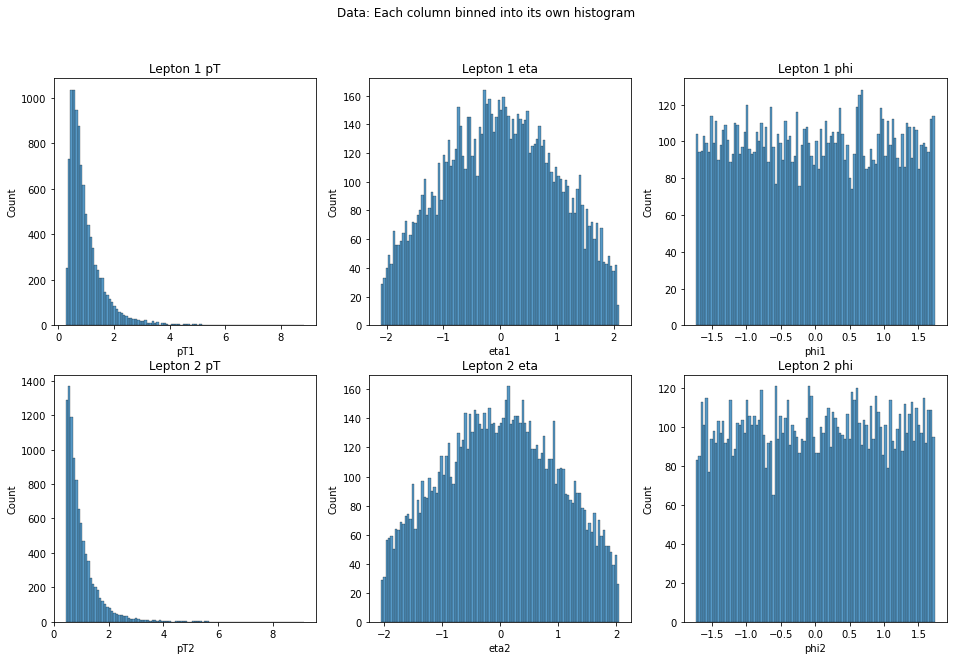

In [391]:
fig, axes = plt.subplots(2, 3, figsize=(16,10))
fig.suptitle("Data: Each column binned into its own histogram")

sns.histplot(data['pT1'], ax=axes[0, 0], bins=100)
axes[0, 0].set_title("Lepton 1 pT")

sns.histplot(data['eta1'], ax=axes[0, 1], bins=100)
axes[0, 1].set_title("Lepton 1 eta")

sns.histplot(data['phi1'], ax=axes[0, 2], bins=100)
axes[0, 2].set_title("Lepton 1 phi")

sns.histplot(data['pT2'], ax=axes[1, 0], bins=100)
axes[1, 0].set_title("Lepton 2 pT")

sns.histplot(data['eta2'], ax=axes[1, 1], bins=100)
axes[1, 1].set_title("Lepton 2 eta")

sns.histplot(data['phi2'], ax=axes[1, 2], bins=100)
axes[1, 2].set_title("Lepton 2 phi")

Text(0.5, 1.0, 'Lepton 2 phi')

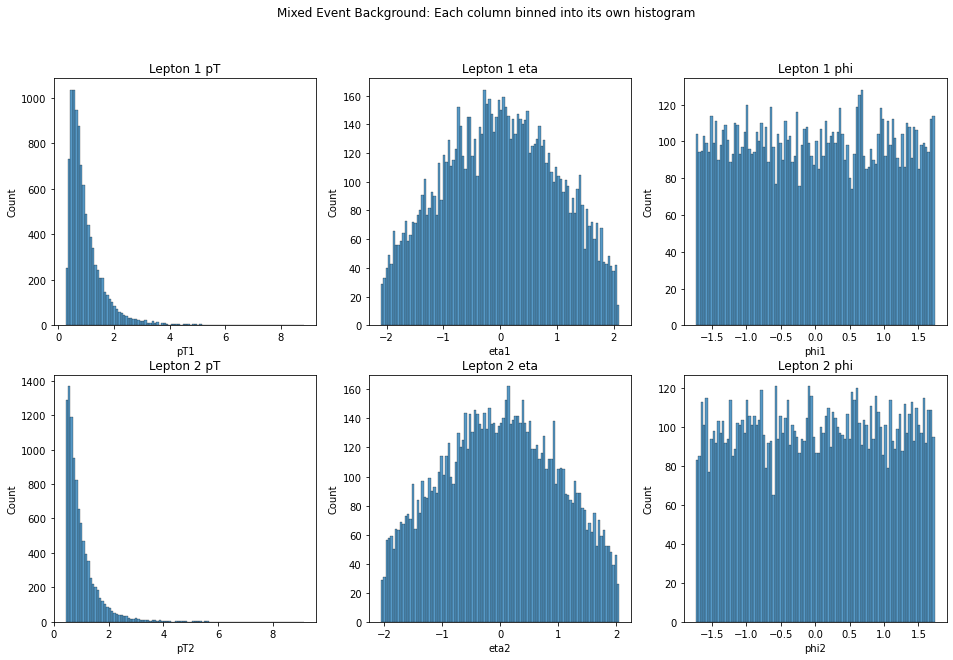

In [392]:
fig, axes = plt.subplots(2, 3, figsize=(16,10))
fig.suptitle("Mixed Event Background: Each column binned into its own histogram")

sns.histplot(data_bg['pT1'], ax=axes[0, 0], bins=100)
axes[0, 0].set_title("Lepton 1 pT")

sns.histplot(data_bg['eta1'], ax=axes[0, 1], bins=100)
axes[0, 1].set_title("Lepton 1 eta")

sns.histplot(data_bg['phi1'], ax=axes[0, 2], bins=100)
axes[0, 2].set_title("Lepton 1 phi")

sns.histplot(data_bg['pT2'], ax=axes[1, 0], bins=100)
axes[1, 0].set_title("Lepton 2 pT")

sns.histplot(data_bg['eta2'], ax=axes[1, 1], bins=100)
axes[1, 1].set_title("Lepton 2 eta")

sns.histplot(data_bg['phi2'], ax=axes[1, 2], bins=100)
axes[1, 2].set_title("Lepton 2 phi")

In [224]:
db_data=DBSCAN(eps=0.15, min_samples=20).fit(data)
data_labels = db_data.labels_
#plt.scatter(db_data, data_labels)
#print(data_labels)
#plt.scatter(db_data, N)

(500,) (500,) (100,)
[ 5.17606576e-01 -1.44964571e+00 -8.72274658e-01  4.94539910e-01
 -1.20801980e+00  1.80298774e+00 -2.33892698e+00  1.19048453e+00
  5.82472183e-01  1.60975002e+00 -9.69205403e-01  1.75713671e+00
  6.53485084e-01 -1.03140567e+00 -1.84118012e+00 -1.24619726e+00
 -6.26624501e-01  2.12352879e-01  2.07441164e+00  2.96573434e-01
  7.34301682e-02  2.70338565e-01 -6.98399738e-01  4.52139985e-01
 -2.74262103e-01  8.18192200e-01 -3.39435153e-01  1.52008552e+00
  2.05527061e-02  1.06218289e+00 -1.06024456e+00  1.52671333e+00
 -7.58717789e-01 -2.47715373e+00 -7.44825652e-01 -1.46124140e+00
 -9.82645331e-01  1.68934420e+00  8.12377325e-01 -1.13712242e+00
 -7.58426646e-01  6.25403676e-01 -9.70972294e-01 -6.13552503e-01
 -7.86889823e-01 -1.54849140e+00  1.34405269e+00 -8.51083836e-01
  1.39267171e+00 -1.60844674e+00  3.06481852e-01 -1.79069715e+00
 -2.54288207e-01  9.04024390e-01  3.49350018e-01 -1.46822037e+00
 -1.39161314e+00 -7.66864621e-01  1.34450163e-01  5.94564536e-01
  1.

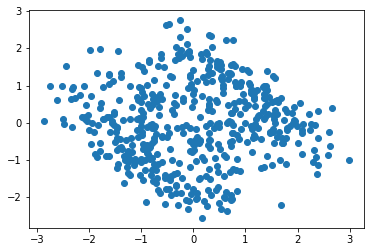

In [201]:
pca_data = PCA(n_components=2).fit(data).transform(data)
plt.scatter(pca_data[:,0], pca_data[:,1])

print(pca_data[:,0].shape, pca_data[:,1].shape, N.shape)
print(pca_data[:,0], pca_data[:,1])

       0         1         2         3         4         5         6  \
0    0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1    1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2    1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3    1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4    1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
..   ...       ...       ...       ...       ...       ...       ...   
495  0.0  0.576426 -0.729576  0.486890  0.968139  1.688898 -1.087328   
496  1.0  1.797547  0.938547 -0.992857  1.610855  0.057331  0.511159   
497  1.0  1.363338 -0.737786  0.606058  0.915946  0.642691 -1.053071   
498  0.0  0.533002 -0.909133  0.876828  0.718447  0.214728  0.046635   
499  1.0  3.413133  0.945585 -1.014896  1.553204  0.817129  0.300755   

            7         8  
0    0.567765 -0.175000  
1    3.475464 -1.219136  
2    1.219918  0.504026  
3    2.033060  1.533041  
4    

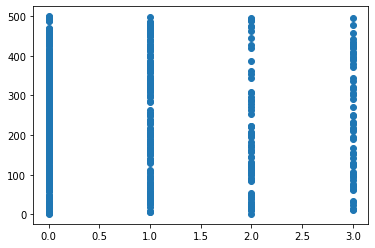

In [223]:
gm_data = GaussianMixture(n_components=4).fit(data).predict(data)
plt.scatter(gm_data, N)

#print(gm_data.shape, N.shape)
print(data)
print(gm_data)

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model

ridge = linear_model.Ridge()
lasso = linear_model.Lasso()

alphas = np.logspace(-2, 6, 10)

train_errors_ridge = list()
test_errors_ridge = list()
train_errors_lasso = list()
test_errors_lasso = list()

coeffs_ridge = []
coeffs_lasso = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(data, N)
    coeffs_ridge.append(ridge.coef_)
    train_errors_ridge.append(ridge.score(data, N))
    test_errors_ridge.append(ridge.score(data, N))
    
    lasso.set_params(alpha=a)
    lasso.fit(data, N)
    coeffs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(data, N))
    test_errors_lasso.append(lasso.score(data, N))

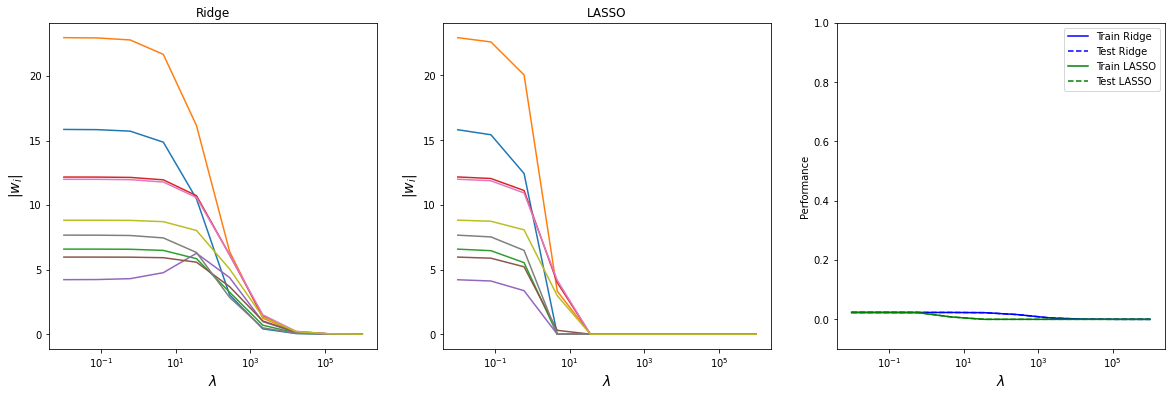

In [228]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.semilogx(alphas, np.abs(coeffs_ridge))
ax1.set_xscale('log')
ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())
ax1.set_xlabel(r'$\lambda$', fontsize=14)
ax1.set_ylabel('$|w_i|$', fontsize=14)
ax1.set_title('Ridge')
ax1.axis('tight')


ax2.semilogx(alphas, np.abs(coeffs_lasso))
ax2.set_xlabel(r'$\lambda$', fontsize=14)
ax2.set_ylabel('$|w_i|$', fontsize=14)
ax2.set_title('LASSO')


ax3.semilogx(alphas, train_errors_ridge, 'b', label='Train Ridge')
ax3.semilogx(alphas, test_errors_ridge, '--b', label='Test Ridge')
ax3.semilogx(alphas, train_errors_lasso, 'g', label='Train LASSO')
ax3.semilogx(alphas, test_errors_lasso, '--g', label='Test LASSO')
ax3.legend(loc='upper right')
ax3.set_ylim([-0.1, 1.0])
ax3.set_xlabel(r'$\lambda$', fontsize=14)
ax3.set_ylabel('Performance')
plt.show()

In [393]:
for i in range(n):
    m_inv = np.sqrt(2*data['pT1']*data['pT2']*(np.cosh(data['eta1']-data['eta2'])-np.cos(data['phi1']-data['phi2'])))
    m_inv_bg = np.sqrt(2*data['pT1']*data_bg['pT2']*(np.cosh(data['eta1']-data_bg['eta2'])-np.cos(data['phi1']-data_bg['phi2'])))

0       3.670657
1       1.861654
2       0.725894
3       1.032753
4       1.745493
          ...   
9995    2.819948
9996    3.506015
9997    1.651160
9998    1.506908
9999    1.301456
Length: 10000, dtype: float64


<AxesSubplot:ylabel='Count'>

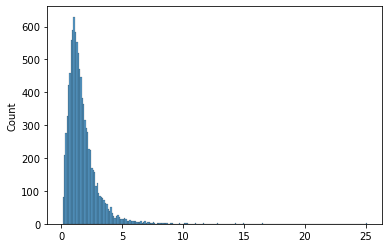

In [394]:
print(m_inv)
sns.histplot(m_inv)

0       2.338297
1       2.759416
2       1.100629
3       0.534182
4       1.710943
          ...   
9995    2.543911
9996    2.467821
9997    2.293573
9998    0.918838
9999    1.831528
Length: 10000, dtype: float64


<AxesSubplot:ylabel='Count'>

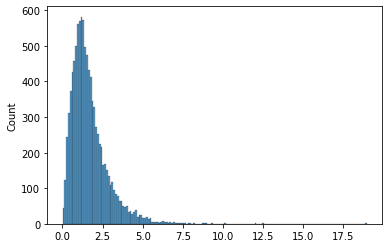

In [395]:
print(m_inv_bg)
sns.histplot(m_inv_bg)

In [398]:
for i in range(n):
    m_sig = m_inv-m_inv_bg
    
print(m_sig)

0       1.332361
1      -0.897762
2      -0.374735
3       0.498571
4       0.034549
          ...   
9995    0.276037
9996    1.038194
9997   -0.642413
9998    0.588070
9999   -0.530072
Length: 10000, dtype: float64


<AxesSubplot:ylabel='Count'>

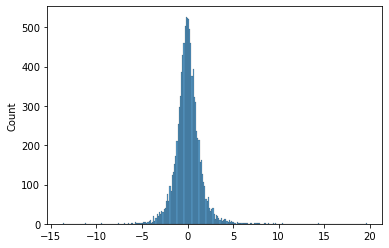

In [399]:
sns.histplot(m_sig)

In [400]:
np.mean(m_sig)

0.026038346780366983

0        0.415991
1        0.037150
2        0.000010
3        0.000155
4        0.020340
           ...   
99995    0.037349
99996    0.001501
99997    0.092713
99998    0.000029
99999    0.000003
Length: 100000, dtype: float64


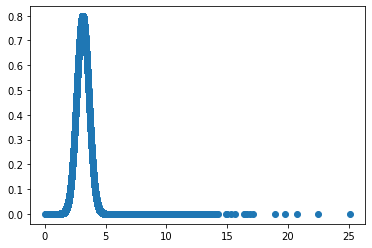

In [341]:
mean_Jpsi = 3.1
sig_Jpsi = 0.5
g_Jpsi = 1/(sig_Jpsi*np.sqrt(2*np.pi))*np.exp(-(m_inv-mean_Jpsi)**2/(2*sig_Jpsi**2))
print(g_Jpsi)
plt.scatter(m_inv, g_Jpsi)

### Supervised Learning 1

Can these simple classifiers predict if a process is signal or background based on 8 low-level (raw) features?

In [483]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [502]:
data_train = np.array(data[0:int(0.90*len(data))])
label_train = np.array(labels[0:int(0.90*len(labels))]).reshape(9000, )

data_test = np.array(data[int(0.90*len(data)):])
label_test = np.array(labels[int(0.90*len(labels)):]).reshape(1000, )

len(data_train), len(label_train), len(data_test), len(label_test)
#print(data_train)
#print(label_train)

(9000, 9000, 1000, 1000)

In [503]:
#Initialize Training Algorithms
LR = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()
LSVM = LinearSVC()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()


LR_fit = LR.fit(data_train, label_train)
KNN_fit = KNN.fit(data_train, label_train)
NB_fit = NB.fit(data_train, label_train)
LSVM_fit = LSVM.fit(data_train, label_train)
DT_fit = DT.fit(data_train, label_train)
RF_fit = RF.fit(data_train, label_train)

C:\Users\micha\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [504]:
#Initialize Predictions

LR_pred = LR.predict(data_test)
KNN_pred = KNN.predict(data_test)
NB_pred = NB.predict(data_test)
LSVM_pred = LSVM.predict(data_test)
DT_pred = DT.predict(data_test)
RF_pred = RF.predict(data_test)

In [505]:
print("Logistic Regression is %f percent accurate" %(accuracy_score(LR_pred, label_test)*100))
print("KNeighbors is %f percent accurate" %(accuracy_score(KNN_pred, label_test)*100))
print("Naive Bayes is %f percent accurate" %(accuracy_score(NB_pred, label_test)*100))
print("Linear SVM is %f percent accurate" %(accuracy_score(LSVM_pred, label_test)*100))
print("Decision Tree is %f percent accurate" %(accuracy_score(DT_pred, label_test)*100))
print("Random Forest is %f percent accurate" %(accuracy_score(RF_pred, label_test)*100))

Logistic Regression is 77.700000 percent accurate
KNeighbors is 74.000000 percent accurate
Naive Bayes is 74.200000 percent accurate
Linear SVM is 77.300000 percent accurate
Decision Tree is 69.400000 percent accurate
Random Forest is 78.700000 percent accurate


**Try again with less features**

In [521]:
n = 10000
N = np.linspace(1, n, n)
data = pd.read_csv('SUSY.csv', dtype=float, nrows=n, usecols=[1, 2, 4, 5], header=None)
data.columns=["pT1", "eta1", "pT2", "eta2"]

labels = pd.read_csv('SUSY.csv', dtype=float, nrows=n, usecols=[0], header=None)
labels.columns=["Labels"]

In [522]:
data_train2 = np.array(data[0:int(0.90*len(data))])
label_train2 = np.array(labels[0:int(0.90*len(labels))]).reshape(9000, )

data_test2 = np.array(data[int(0.90*len(data)):])
label_test2 = np.array(labels[int(0.90*len(labels)):]).reshape(1000, )

len(data_train2), len(label_train2), len(data_test2), len(label_test2)

LR_fit = LR.fit(data_train2, label_train2)
KNN_fit = KNN.fit(data_train2, label_train2)
NB_fit = NB.fit(data_train2, label_train2)
LSVM_fit = LSVM.fit(data_train2, label_train2)
DT_fit = DT.fit(data_train2, label_train2)
RF_fit = RF.fit(data_train2, label_train2)

LR_pred = LR.predict(data_test2)
KNN_pred = KNN.predict(data_test2)
NB_pred = NB.predict(data_test2)
LSVM_pred = LSVM.predict(data_test2)
DT_pred = DT.predict(data_test2)
RF_pred = RF.predict(data_test2)

print("Logistic Regression is %f percent accurate" %(accuracy_score(LR_pred, label_test2)*100))
print("KNeighbors is %f percent accurate" %(accuracy_score(KNN_pred, label_test2)*100))
print("Naive Bayes is %f percent accurate" %(accuracy_score(NB_pred, label_test2)*100))
print("Linear SVM is %f percent accurate" %(accuracy_score(LSVM_pred, label_test2)*100))
print("Decision Tree is %f percent accurate" %(accuracy_score(DT_pred, label_test2)*100))
print("Random Forest is %f percent accurate" %(accuracy_score(RF_pred, label_test2)*100))

C:\Users\micha\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Logistic Regression is 72.300000 percent accurate
KNeighbors is 68.800000 percent accurate
Naive Bayes is 66.700000 percent accurate
Linear SVM is 71.500000 percent accurate
Decision Tree is 62.400000 percent accurate
Random Forest is 70.900000 percent accurate


### Supervised Learning 2

This time I will use more complex classifiers like we used in class

**Softmax (multinomial logistic) regression in pytorch (from week 6)**

In [455]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as Tfuns
from torch.autograd import Variable

In [450]:
n_batch = 100

train_loader = torch.utils.data.DataLoader(dataset=data_train, batch_size=n_batch, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=data_test, batch_size=n_batch, shuffle=True)

In [ ]:
iter = 0
for i, (features, labels) in enumerate(train_loader):
    iter+=1

In [454]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        

    def forward(self, x):
        outputs = self.linear(x)
        return outputs
    
epochs = 5
input_dim = len(data_train)
output_dim = 2
lr_rate = 0.001

model = LogisticRegression(input_dim, output_dim)
loss_func = torch.nn.CrossEntropyLoss()
optimize_SGD = torch.optim.SGD(model.parameters(), lr=lr_rate)

In [507]:
iter = 0
iter_keep_SGD_100_001 = np.array([])
acc_keep_SGD_100_001 = np.array([])
for epoch in range(int(epochs)):
    for i, (features, labels) in enumerate(train_loader):
        features = len(label_train)
        labels = Variable(label_train)
        optimize_SGD.zero_grad() 
        
        # Forward pass.
        outputs = model(features)
        
        # Calculate loss.
        loss = loss_func(outputs, labels)
        
        # Backward pass.
        loss.backward()
        
        # Optimizer update.
        optimize_SGD.step()
        
        # Every so often, calculate training and test errors.
        iter += 1
        if iter%batch_size == 0:
            correct = 0
            total = 0
            for features, labels in test_loader:
                features = len(label_train)
                outputs = model(features)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
            accuracy = 100*correct/total
            acc_keep_SGD_100_001 = np.append(acc_keep_SGD_100_001, accuracy)
            iter_keep_SGD_100_001 = np.append(iter_keep_SGD_100_001, iter)
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter, loss.item(), accuracy))

ValueError: too many values to unpack (expected 2)

**CART tree in sklearn (week 3)**

In [514]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz

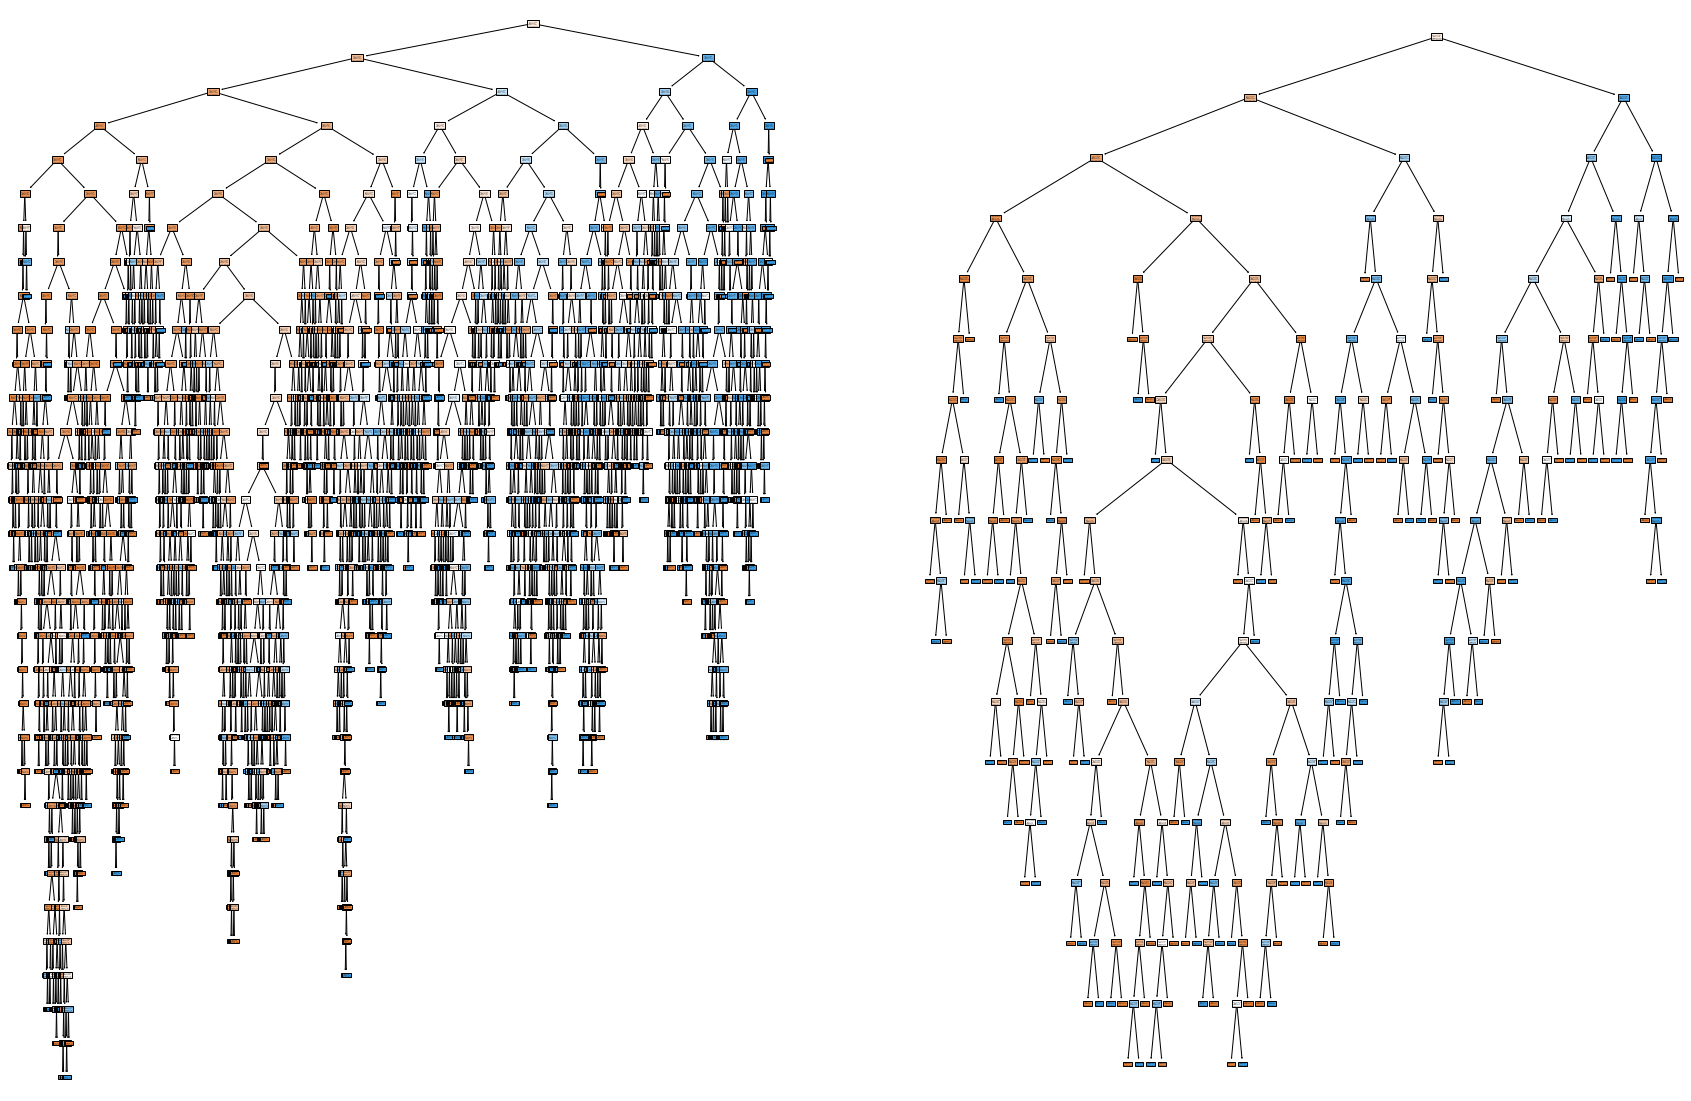

In [506]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.9, random_state=42)

fig=plt.figure(figsize=(30,20))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

model_train = tree.DecisionTreeClassifier(criterion = 'gini')
model_fit = model_train.fit(X_train, y_train)

tree.plot_tree(model_fit,filled = True , ax=ax1)

model_test = tree.DecisionTreeClassifier(criterion = 'gini')
model_fit = model_test.fit(X_test, y_test)

tree.plot_tree(model_fit,filled = True , ax=ax2)
plt.show()

In [516]:
fig.savefig("decision_tree_gini.png")

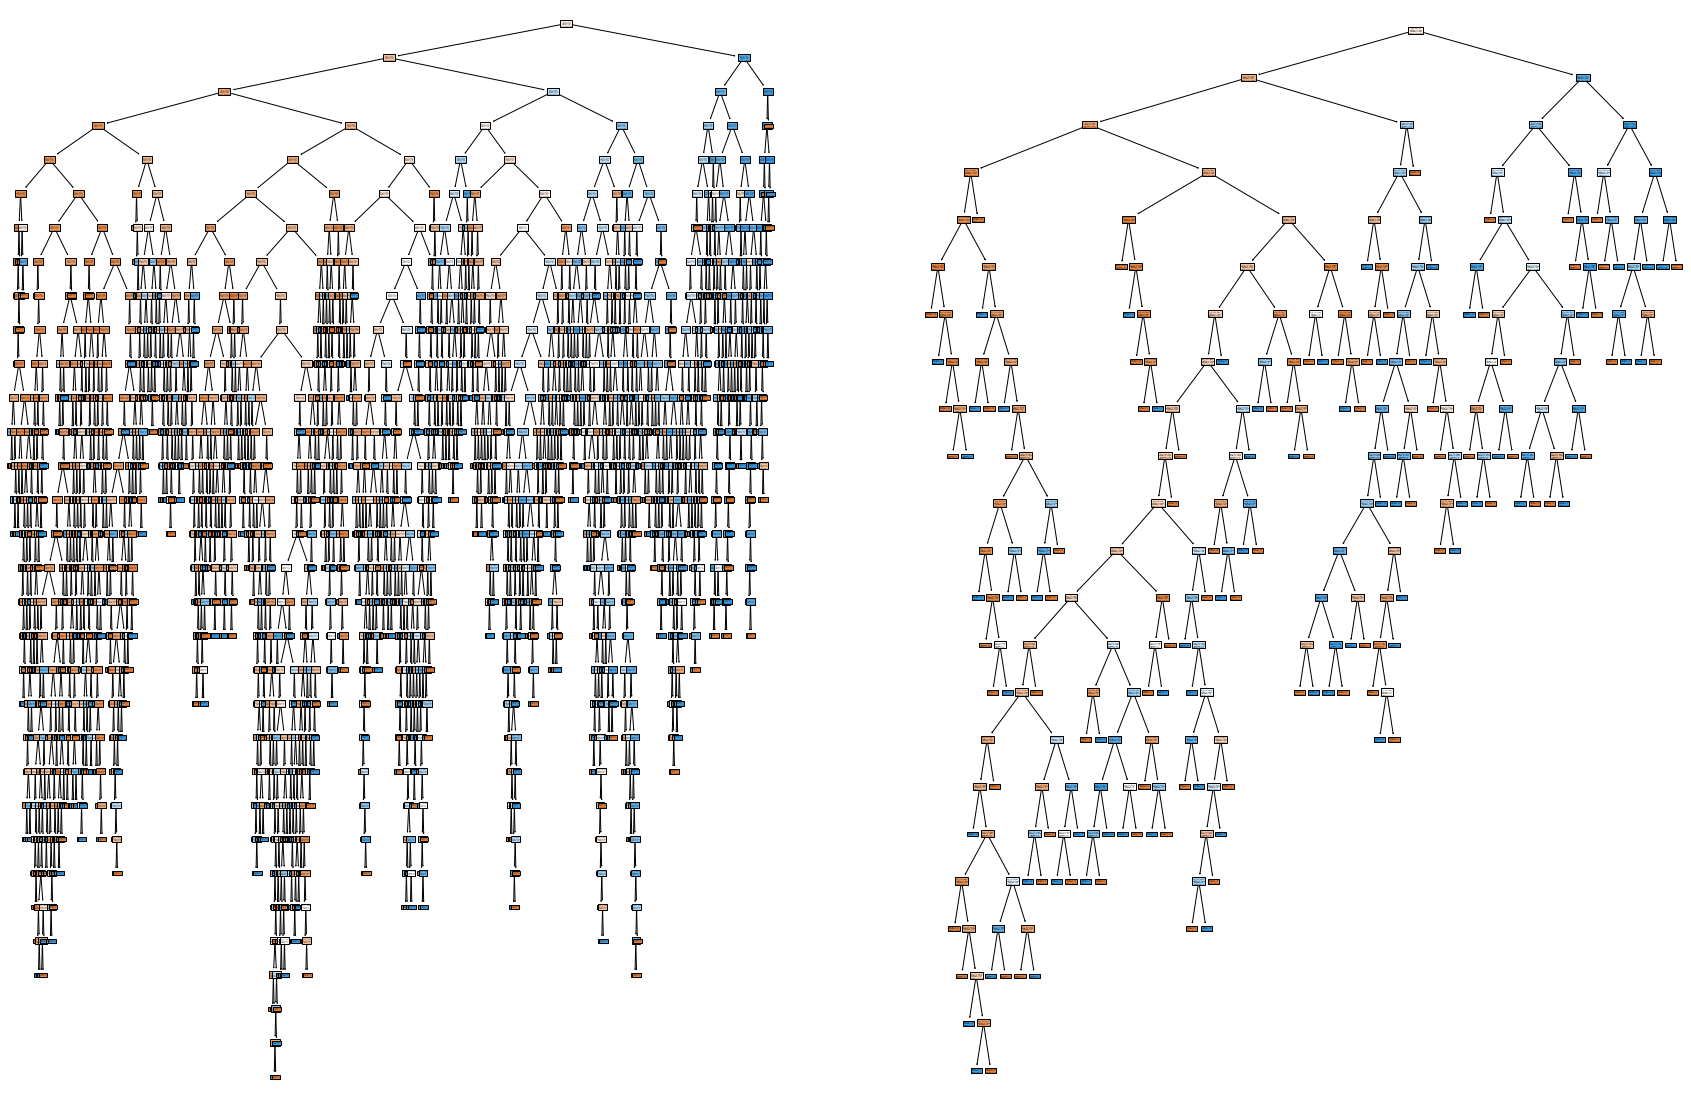

In [512]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.9, random_state=42)

fig=plt.figure(figsize=(30,20))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

model_train = tree.DecisionTreeClassifier(criterion = 'entropy')
model_fit = model_train.fit(X_train, y_train)

tree.plot_tree(model_fit,filled = True , ax=ax1)

model_test = tree.DecisionTreeClassifier(criterion = 'entropy')
model_fit = model_test.fit(X_test, y_test)

tree.plot_tree(model_fit,filled = True , ax=ax2)
plt.show()

In [517]:
fig.savefig("decision_tree_entropy.png")

**Same tree classifier, but less features and smaller sample**

In [523]:
n = 1000
N = np.linspace(1, n, n)
data = pd.read_csv('SUSY.csv', dtype=float, nrows=n, usecols=[1, 2, 4, 5], header=None)
data.columns=["pT1", "eta1", "pT2", "eta2"]

labels = pd.read_csv('SUSY.csv', dtype=float, nrows=n, usecols=[0], header=None)
labels.columns=["Labels"]

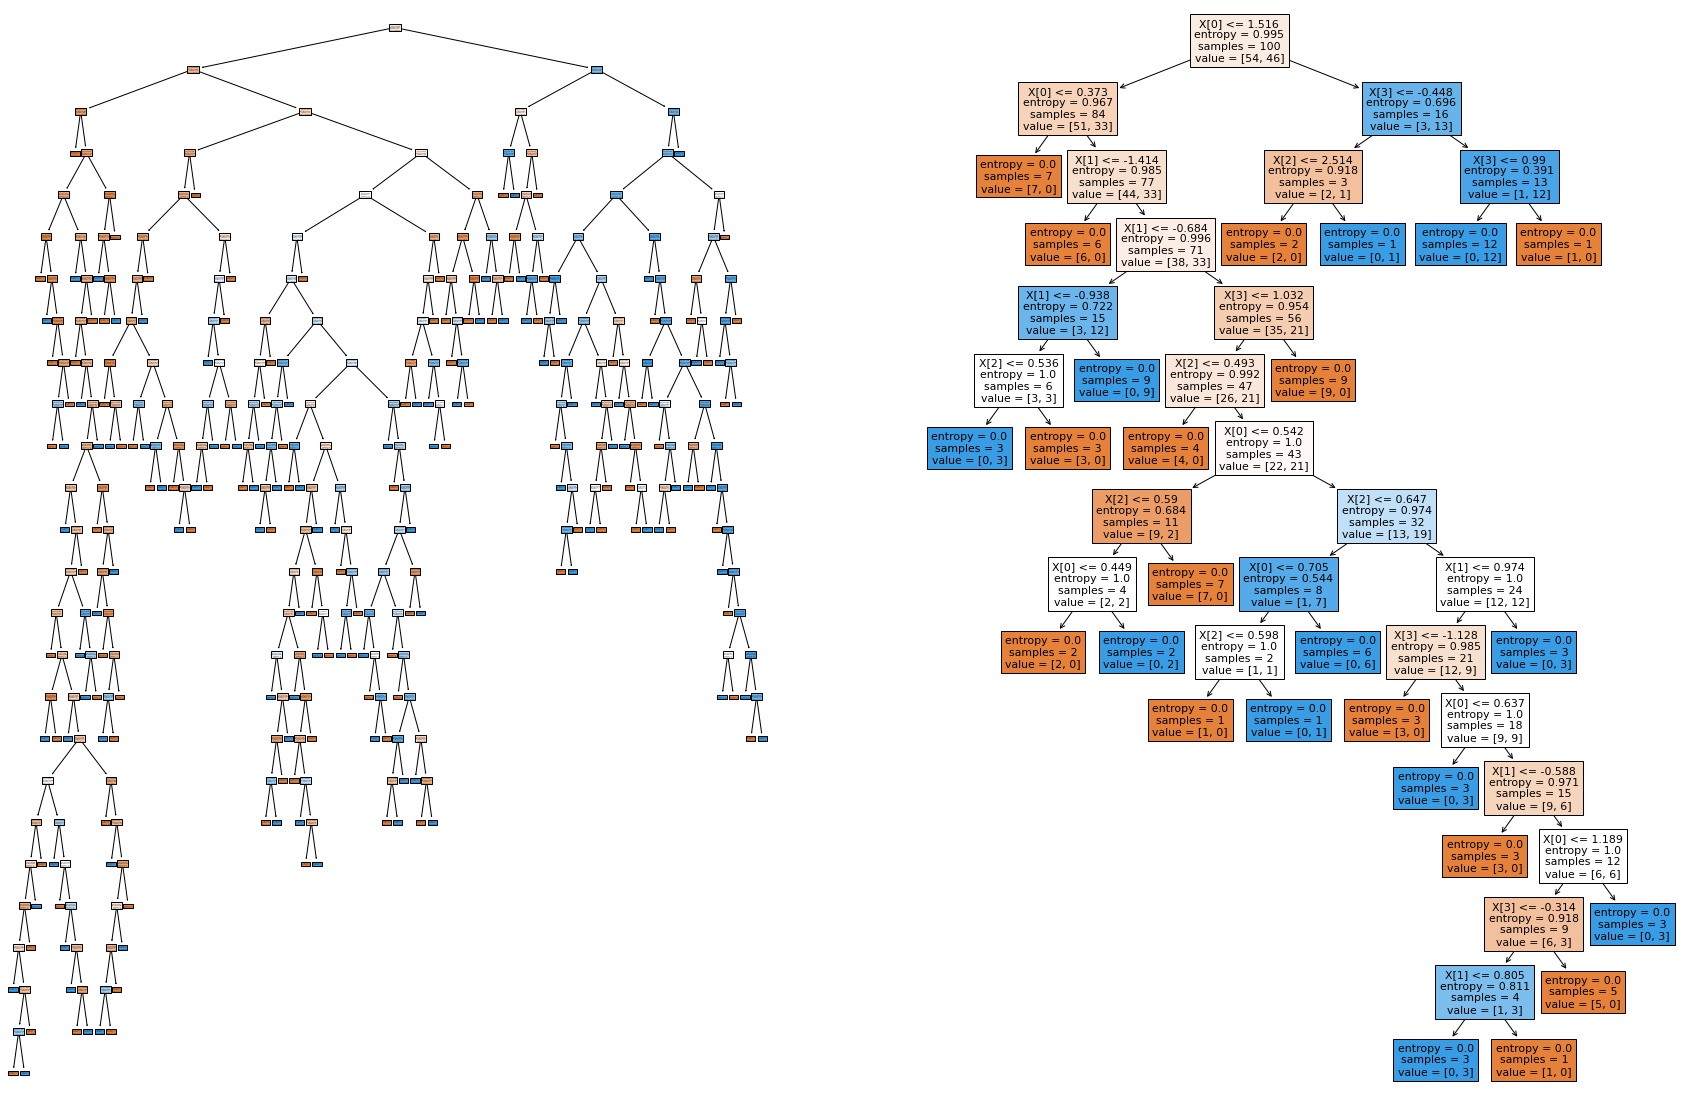

In [524]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.9, random_state=42)

fig=plt.figure(figsize=(30,20))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

model_train = tree.DecisionTreeClassifier(criterion = 'entropy')
model_fit = model_train.fit(X_train, y_train)

tree.plot_tree(model_fit,filled = True , ax=ax1)

model_test = tree.DecisionTreeClassifier(criterion = 'entropy')
model_fit = model_test.fit(X_test, y_test)

tree.plot_tree(model_fit,filled = True , ax=ax2)
plt.show()

In [531]:
fig.savefig("decision_tree_entropy_n1000.png")